In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("new_college.csv")

In [6]:
df.head()

,Name,G,FGA,3PA,FTA,ORB,TRB.1,AST.1,STL,BLK,...,Years,AP,LAT,SR,TQS,SVL,MVL,MBP,VORP,VORP_Max
0,abdelal01,33.500000,5.375016,NaN,2.340140,NaN,3.525,0.325,0.351910,0.484922,...,4.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,-0.460000,-0.2
1,abdulma02,32.000000,21.890625,7.218750,6.406250,NaN,2.950,3.650,1.671875,0.109375,...,2.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.088889,1.6
2,abdulta01,27.666667,11.285641,1.922756,4.859071,NaN,5.800,1.400,1.020833,0.599423,...,3.0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,-0.216667,0.2
3,abdursh01,28.000000,14.214286,0.750000,8.892857,NaN,8.400,1.000,1.857143,1.250000,...,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.772727,3.5
4,ackeral01,29.333333,11.107461,3.282642,3.524432,NaN,5.600,2.800,1.515493,0.430174,...,3.0,0.000000,11.67,NaN,3.35,28.0,32.0,11.0,-0.150000,-0.1


In [7]:
df_cleaned = df.fillna(np.mean(df, axis=0))

In [8]:
X = df_cleaned.values[:,1:24]
Y = df_cleaned.VORP_Max

## Normalization

In [ ]:
X_normed = StandardScaler().fit_transform(X)

In [11]:
X_normed

array([[  7.84371487e-01,  -1.40524409e+00,  -9.30482893e-16, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       [  3.43245195e-01,   3.71041053e+00,   2.52493684e+00, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       [ -9.31119647e-01,   4.25552198e-01,  -2.49185642e-01, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       ..., 
       [ -1.42125997e+00,  -1.58430783e+00,  -1.20715687e+00, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       [  2.69724147e-01,  -1.46090596e+00,  -6.68410415e-01, ...,
         -2.68904671e+00,   2.78245600e+00,   3.12380257e+00],
       [ -1.42125997e+00,  -5.20684128e-01,  -9.13860250e-01, ...,
          2.27667261e+00,  -2.46689929e+00,  -2.17067071e+00]])

## Linear Regression

In [13]:
ten_fold = model_selection.KFold(n_splits=10)

In [14]:
lr_model = LinearRegression()
# lr_model.fit(X_normed, Y)

R2 = model_selection.cross_val_score(lr_model, X_normed, Y, cv=ten_fold, scoring='r2')
MSE = model_selection.cross_val_score(lr_model, X_normed, Y, cv=ten_fold, scoring='neg_mean_squared_error')

print("R Squared score of 10-fold cross validation: {0} ".format(R2))
print("MSE score of 10-fold cross validation: {0} ".format(-MSE))

R Squared score of 10-fold cross validation: [ 0.15145039  0.22525397  0.32016299  0.14910338  0.16388545  0.17984808
  0.29173092  0.15702101  0.00577214  0.10614464] 
MSE score of 10-fold cross validation: [ 2.37346138  1.40533488  1.91667535  2.0060124   2.25896726  2.23012245
  2.39392806  2.39110991  1.32297701  2.1740341 ] 


## Drop Physical Attributes

In [15]:
df_cleaned.columns

Index([u'Name', u'G', u'FGA', u'3PA', u'FTA', u'ORB', u'TRB.1', u'AST.1',
       u'STL', u'BLK', u'TOV', u'PF', u'MP.1', u'PTS.1', u'FG%', u'3P%',
       u'FT%', u'Years', u'AP', u'LAT', u'SR', u'TQS', u'SVL', u'MVL', u'MBP',
       u'VORP', u'VORP_Max'],
      dtype='object')

In [16]:
df_cleaned.head(3)

,Name,G,FGA,3PA,FTA,ORB,TRB.1,AST.1,STL,BLK,...,Years,AP,LAT,SR,TQS,SVL,MVL,MBP,VORP,VORP_Max
0,abdelal01,33.500000,5.375016,2.398469,2.340140,1.64398,3.525,0.325,0.351910,0.484922,...,4.0,0.500000,11.33395,3.045263,3.278702,29.759546,34.894886,10.743644,-0.460000,-0.2
1,abdulma02,32.000000,21.890625,7.218750,6.406250,1.64398,2.950,3.650,1.671875,0.109375,...,2.0,0.000000,11.33395,3.045263,3.278702,29.759546,34.894886,10.743644,-0.088889,1.6
2,abdulta01,27.666667,11.285641,1.922756,4.859071,1.64398,5.800,1.400,1.020833,0.599423,...,3.0,0.333333,11.33395,3.045263,3.278702,29.759546,34.894886,10.743644,-0.216667,0.2


In [17]:
df_cleaned["Y1"]=0.0
df_cleaned["Y2"]=0.0
df_cleaned["Y3"]=0.0
df_cleaned["Y4"]=0.0

In [ ]:
df_cleaned.Y1[df_cleaned["Years"]==1.0]=1.0
df_cleaned.Y2[df_cleaned["Years"]==2.0]=2.0
df_cleaned.Y3[df_cleaned["Years"]==3.0]=3.0
df_cleaned.Y4[df_cleaned["Years"]==4.0]=4.0

In [19]:
df_cleaned.columns

Index([u'Name', u'G', u'FGA', u'3PA', u'FTA', u'ORB', u'TRB.1', u'AST.1',
       u'STL', u'BLK', u'TOV', u'PF', u'MP.1', u'PTS.1', u'FG%', u'3P%',
       u'FT%', u'Years', u'AP', u'LAT', u'SR', u'TQS', u'SVL', u'MVL', u'MBP',
       u'VORP', u'VORP_Max', u'Y1', u'Y2', u'Y3', u'Y4'],
      dtype='object')

In [20]:
X_1_t = df_cleaned.ix[:,['G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK', 'TOV', 'PF', 'MP.1', 
                       'PTS.1', 'FG%', '3P%', 'FT%', 'AP', 'LAT','SR', 'TQS', 'SVL', 'MVL', 'MBP', 'Y1', 'Y2', 'Y3','Y4']]
X_1 = X_1_t.values
Y_1 = df_cleaned.VORP
X_1_normed = StandardScaler().fit_transform(X_1)

lr_model_1 = LinearRegression()
# lr_model.fit(X_normed, Y)

R2_1 = model_selection.cross_val_score(lr_model_1, X_1_normed, Y_1, cv=ten_fold, scoring='r2').mean()
MSE_1 = model_selection.cross_val_score(lr_model_1, X_1_normed, Y_1, cv=ten_fold, scoring='neg_mean_squared_error')

print("R Squared score of 10-fold cross validation: {0} ".format(R2_1))
print("MSE score of 10-fold cross validation: {0} ".format(-MSE_1))

R Squared score of 10-fold cross validation: 0.172876596585 
MSE score of 10-fold cross validation: [ 0.60219282  0.31183676  0.62912709  0.52488956  0.79913594  0.69065432
  0.71855066  0.65621733  0.41167556  0.59741157] 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b069d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114cfd550>]], dtype=object)

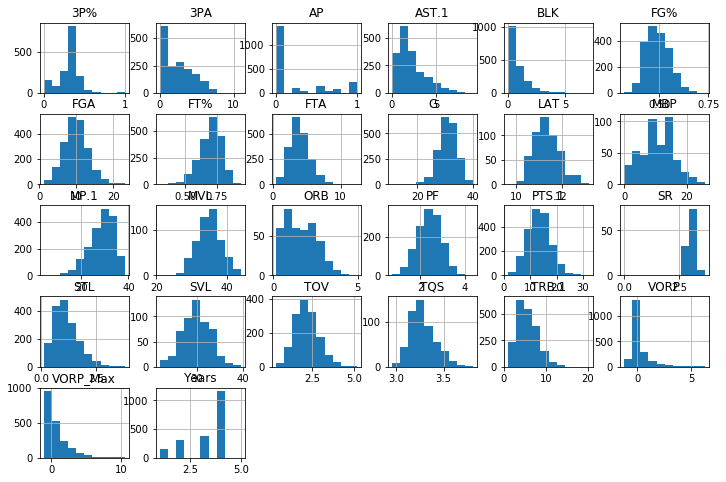

In [21]:
df.hist(figsize=(12,8), layout=(5,6))

## Classification and Regression Trees (CART)

In [22]:
cart1 = DecisionTreeRegressor(min_samples_split=10, max_depth=2)
cart1.fit(X_1_normed, Y_1)
print(cart1)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [23]:
model_selection.cross_val_score(cart1, X_1_normed, Y_1, scoring = 'neg_mean_squared_error', cv = 10)

array([-0.78128192, -0.38615775, -0.74611006, -0.61239825, -0.86170293,
       -0.74848834, -0.87515663, -0.71459777, -0.41824036, -0.61281829])

In [24]:
model_selection.cross_val_score(cart1, X_1_normed, Y_1, scoring = 'r2', cv = 10)

array([-0.08357102,  0.06325349,  0.15069907,  0.00530794,  0.09419827,
        0.09614054,  0.11153619,  0.05882379,  0.03316033,  0.08559733])

## Classification

In [ ]:
df_cleaned["Superstar"]="0"
df_cleaned.Superstar[df_cleaned["VORP"]>=1.0]="1"

In [26]:
Y_2 = df_cleaned.Superstar

In [27]:
# 10-fold Cross-Validation
logreg_cv = linear_model.LogisticRegressionCV(cv=10, class_weight='balanced')
logreg_cv.fit(X_1_normed, Y_2)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [28]:
# 10-fold cross-validation error
logreg_cv.score(X_1_normed, Y_2)

0.75062468765617196

In [29]:
Y_2_pred = logreg_cv.predict(X_1_normed)
Y_2_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [34]:
#confusion_matrix(Y_2, Y_2_pred)

In [35]:
208/(1736+208)

0

## Random Forest

In [36]:
rf = RandomForestClassifier(n_estimators = 10, max_features = 5)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_1_normed, Y_2)

In [38]:
rf.fit(X_train, Y_train)
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)
print(metrics.confusion_matrix(Y_train, Y_train_pred))
print(metrics.confusion_matrix(Y_test, Y_test_pred))

[[1307    1]
 [  20  172]]
[[440   3]
 [ 53   5]]


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_train_pred = gbc.predict(X_train)
Y_test_pred = gbc.predict(X_test)
print(metrics.confusion_matrix(Y_train, Y_train_pred))
print(metrics.confusion_matrix(Y_test, Y_test_pred))

[[1307    1]
 [  61  131]]
[[431  12]
 [ 53   5]]
